In [36]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [37]:
from fastai.vision import *
from fastai import *
from fastai.metrics import error_rate
import pandas as pd
import torch

In [38]:
path ="../input/"
train_df=pd.read_csv(path+"train.csv")
test_df=pd.read_csv(path+"sample_submission.csv")

In [39]:
bs = 128
data = ImageDataBunch.from_csv(path=path, folder='train/train', csv_labels='train.csv', ds_tfms=get_transforms(), size=32, bs=bs).normalize(imagenet_stats)

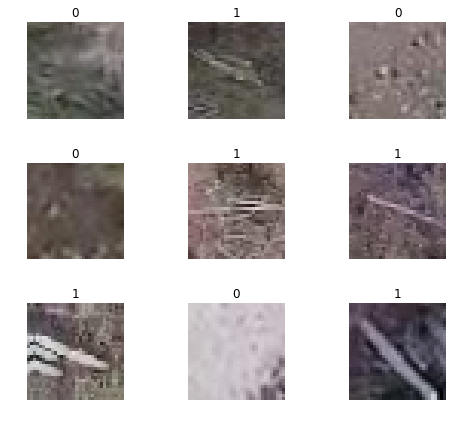

In [40]:
data.show_batch(rows=3, figsize=(7,6))

In [41]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

([0, 1], 2, 14000, 3500)

In [42]:
learn = cnn_learner(data, models.densenet161, metrics=error_rate, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /tmp/.torch/models/densenet161-8d451a50.pth
115730790it [00:01, 76090126.74it/s]


In [43]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.182976,0.046483,0.016571,00:45
1,0.077433,0.029765,0.011714,00:39
2,0.051611,0.020772,0.008571,00:39
3,0.037185,0.015979,0.006000,00:39
4,0.024280,0.019075,0.008286,00:40
5,0.020223,0.019725,0.008857,00:39


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


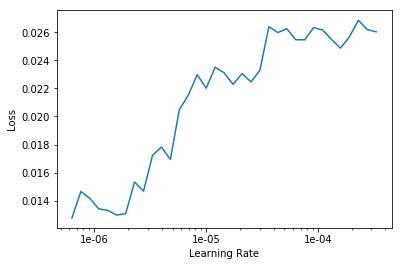

In [44]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()


In [45]:
learn.fit_one_cycle(5, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.023104,0.057377,0.010286,00:43
1,0.022595,0.013139,0.004857,00:44
2,0.017221,0.008036,0.002857,00:43
3,0.010172,0.006775,0.002857,00:43
4,0.007530,0.006635,0.002000,00:44


In [46]:
interp = ClassificationInterpretation.from_learner(learn)

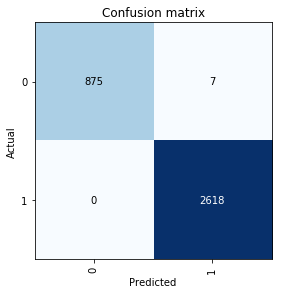

In [47]:
interp.plot_confusion_matrix()

In [48]:
a,b,c=learn.predict(open_image("../input/test/test/"+"000940378805c44108d287872b2f04ce.jpg"))
print(c)
print(c[1].numpy())

tensor([5.1127e-05, 9.9995e-01])
0.99994886


In [49]:
test_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [50]:
def pred(name):
    a,b,c=learn.predict(open_image("../input/test/test/"+name))
    return c[1].numpy()

In [51]:
test_df["has_cactus"]=test_df["id"].apply(lambda x:pred(x))

In [52]:
test_df.to_csv('submission.csv',index=False)